In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# list of indexes
indices = ["SP500", "NASDAQ", "STOXX50", "FTSE100"]

data = {}

for name in indices:
    df = pd.read_csv(f"../data/{name}.csv", parse_dates=[0], index_col=0)
    data[name] = df
    print(f"{name} loaded: {df.shape[0]} rows")


SP500 loaded: 10082 rows
NASDAQ loaded: 10082 rows
STOXX50 loaded: 4454 rows
FTSE100 loaded: 10105 rows


/tmp/ipykernel_2924/920894488.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f"../data/{name}.csv", parse_dates=[0], index_col=0)
/tmp/ipykernel_2924/920894488.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f"../data/{name}.csv", parse_dates=[0], index_col=0)
/tmp/ipykernel_2924/920894488.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f"../data/{name}.csv", parse_dates=[0], index_col=0)
/tmp/ipykernel_2924/920894488.py:14: UserWarning: Could not infer format, so each element will be parsed individually, fa

In [ ]:
returns = {}

for name, df in data.items():
    # Ensure 'Close' is numeric (convert from string if necessary)
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

    # Compute daily log returns based on closing prices
    df["log_return"] = np.log(df["Close"]).diff()

    # Store the series in a separate dictionary
    returns[name] = df["log_return"]

    print(f"{name}: log returns computed. Null values: {df['log_return'].isna().sum()}")


SP500: log returns computed. Null values: 3
NASDAQ: log returns computed. Null values: 3
STOXX50: log returns computed. Null values: 3
FTSE100: log returns computed. Null values: 3


In [5]:
volatility = {}

for name, df in data.items():
    # 30-day rolling standard deviation of log returns, annualized
    df["vol_30d"] = df["log_return"].rolling(30).std() * np.sqrt(252)

    volatility[name] = df["vol_30d"]

    print(f"{name}: 30-day rolling volatility computed.")


SP500: 30-day rolling volatility computed.
NASDAQ: 30-day rolling volatility computed.
STOXX50: 30-day rolling volatility computed.
FTSE100: 30-day rolling volatility computed.


In [6]:
drawdowns = {}

for name, df in data.items():
    # Rolling maximum of the closing price
    rolling_max = df["Close"].cummax()

    # Drawdown as percentage drop from the rolling max
    df["drawdown"] = (df["Close"] - rolling_max) / rolling_max

    drawdowns[name] = df["drawdown"]

    print(f"{name}: drawdown series computed.")


SP500: drawdown series computed.
NASDAQ: drawdown series computed.
STOXX50: drawdown series computed.
FTSE100: drawdown series computed.


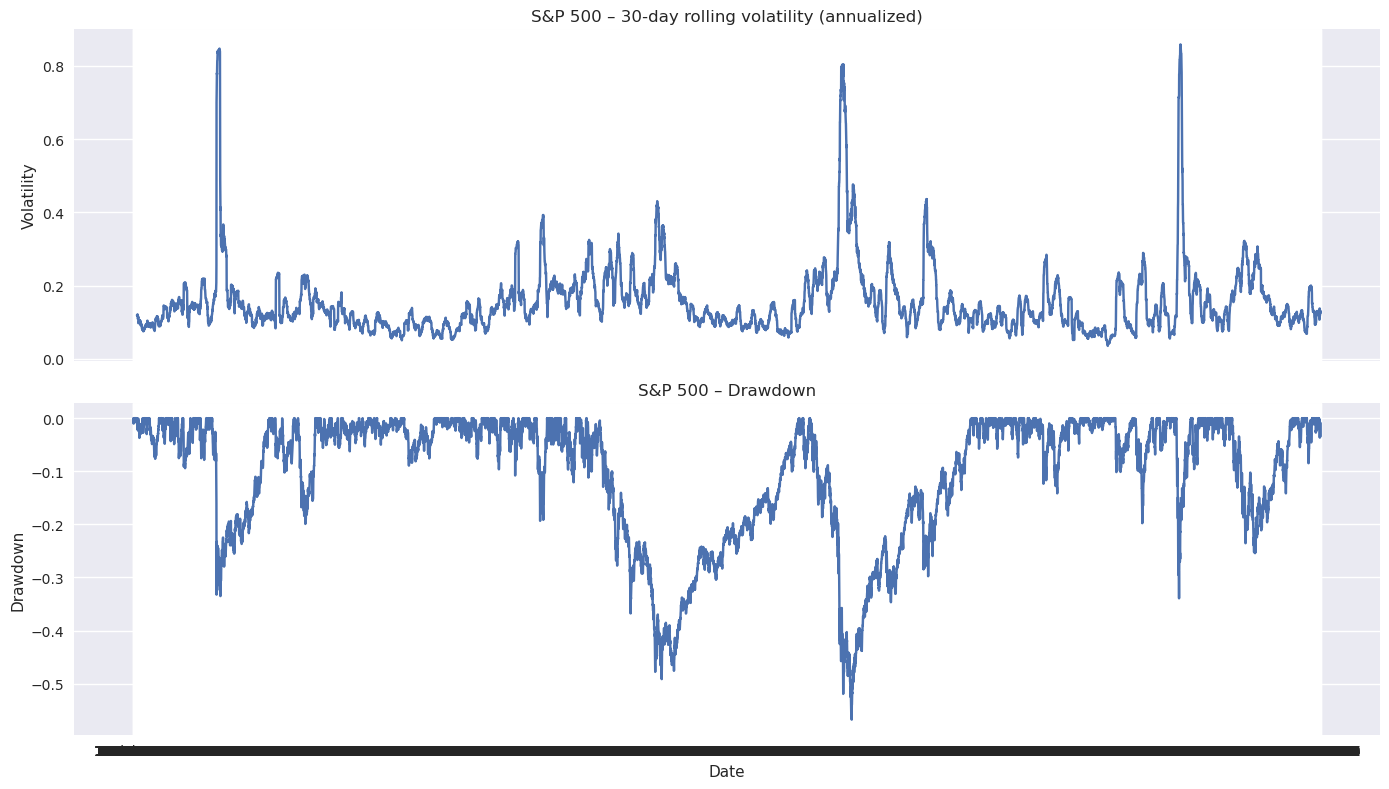

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot 30-day volatility
ax[0].plot(data["SP500"]["vol_30d"])
ax[0].set_title("S&P 500 – 30-day rolling volatility (annualized)")
ax[0].set_ylabel("Volatility")

# Plot drawdown
ax[1].plot(data["SP500"]["drawdown"])
ax[1].set_title("S&P 500 – Drawdown")
ax[1].set_ylabel("Drawdown")
ax[1].set_xlabel("Date")

plt.tight_layout()
plt.show()
